In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.ndimage import gaussian_filter1d
from IPython.display import display

# brainbox / iblatlas / ONE 관련
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from brainbox.ephys_plots import plot_brain_regions
from iblatlas.atlas import AllenAtlas
from one.api import ONE

from matplotlib import cm, colors

In [2]:
# -----------------------------------------------------------------------------
# 1. ONE 초기화 및 세션 검색
# -----------------------------------------------------------------------------
one = ONE()
brain_acronym = 'VISp' # only Left Hemisphere

# VISp 관련 세션 검색
sessions = one.search(atlas_acronym=brain_acronym, query_type='remote')
print(f'\nNo. of detected sessions in {brain_acronym}: {len(sessions)}\n')
pprint(sessions[0:5])

# 특정 eid 선택
eid = 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53'
pids, labels = one.eid2pid(eid)
for pid, name in zip(pids, labels):
    print(f'pid: {pid}, pname: {name}')

# 관련 pid
pid = '92822789-608f-44a6-ad64-fe549402b2df'
# pid = 'c5b9e063-f640-4936-b851-f7602cb6659b'
eid, pname = one.pid2eid(pid)
print(f'eid: {eid}, pname: {pname}')

# -----------------------------------------------------------------------------
# 2. Trial 정보 로드 및 표시
# -----------------------------------------------------------------------------
trials = one.load_object(eid, 'trials')
print('Keys of trials:', list(trials.keys()))

trials_df = trials.to_df()
display(trials_df)  # IPython.display 사용

No. of all subjects in ONE: 333

['CSHL034', 'CSHL045', 'CSHL046', 'CSHL047', 'CSHL049']

No. of detected sessions in VISp: 73

['5ae68c54-2897-4d3a-8120-426150704385',
 '6899a67d-2e53-4215-a52a-c7021b5da5d4',
 'ca4ecb4c-4b60-4723-9b9e-2c54a6290a53',
 '7dd27c2f-9544-448d-918d-be0f9837b0e0',
 'caa5dddc-9290-4e27-9f5e-575ba3598614']

No. of unique subjects related to VISp: 49

{'CSHL047',
 'CSHL052',
 'CSHL054',
 'CSHL059',
 'CSHL060',
 'CSH_ZAD_011',
 'CSH_ZAD_022',
 'CSH_ZAD_025',
 'CSH_ZAD_026',
 'CSH_ZAD_029',
 'DY_009',
 'DY_010',
 'DY_013',
 'DY_016',
 'DY_018',
 'DY_020',
 'KS014',
 'KS042',
 'KS046',
 'KS055',
 'MFD_05',
 'MFD_06',
 'MFD_08',
 'NR_0020',
 'NR_0021',
 'NR_0024',
 'NR_0028',
 'NR_0031',
 'NYU-12',
 'NYU-26',
 'NYU-27',
 'NYU-39',
 'NYU-47',
 'NYU-48',
 'PL015',
 'PL050',
 'SWC_052',
 'SWC_053',
 'UCLA015',
 'UCLA017',
 'UCLA033',
 'UCLA034',
 'UCLA037',
 'UCLA044',
 'UCLA049',
 'ZFM-01577',
 'ibl_witten_20',
 'ibl_witten_26',
 'ibl_witten_29'}


In [4]:
# -----------------------------------------------------------------------------
# 3. Spike Sorting 데이터 로드 / good 클러스터 추출
# -----------------------------------------------------------------------------
ba = AllenAtlas()
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()

# 클러스터 병합
clusters = ssl.merge_clusters(spikes, clusters, channels)

# good 클러스터( label == 1 )
good_cluster_idx = (clusters['label'] == 1)
clusters_good = {key: val[good_cluster_idx] for key, val in clusters.items()}

all_clusters = clusters['label'].shape
good_clusters = clusters_good['label'].shape

# -----------------------------------------------------------------------------
# 4. Clusters / Good Clusters의 뇌 영역(Acronym) 통계
# -----------------------------------------------------------------------------
print(f'\nNo. of all clusters in the session: {all_clusters}')
acronyms = clusters['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
print('\nNo. of clusters in each region:')
num_clusters = 0
for a, c in zip(unique_acronyms, count): # a 내에 VISp가 포함되어 있으면 count를 더한다.
    print(f'{a}: {c}')
    if brain_acronym in a:
        num_clusters += c
print(f'\nNo. of clusters in {brain_acronym}: {num_clusters}')


print(f'\nNo. of good clusters in the session: {good_clusters}')
acronyms = clusters_good['acronym']
unique_acronyms, count = np.unique(acronyms, return_counts=True)
print('\nNo. of good clusters in each region:')
num_good_clusters = 0
for a, c in zip(unique_acronyms, count):
    print(f'{a}: {c}')
    if brain_acronym in a:
        num_good_clusters += c

print(f'\nNo. of good clusters in {brain_acronym}: {num_good_clusters}')

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)



No. of all clusters in the session: (765,)

No. of clusters in each region:
DG-mo: 2
MB: 15
MRN: 79
ProS: 154
RN: 88
SCig: 77
SCiw: 48
SUB: 37
VISp1: 50
VISp2/3: 72
VISp4: 22
VISp5: 59
VISp6a: 29
VISp6b: 8
alv: 3
dhc: 3
fp: 5
or: 13
void: 1

No. of clusters in VISp: 240

No. of good clusters in the session: (75,)

No. of good clusters in each region:
MB: 1
MRN: 9
ProS: 18
RN: 6
SCig: 5
SCiw: 4
SUB: 3
VISp2/3: 9
VISp4: 3
VISp5: 9
VISp6a: 5
alv: 1
or: 2

No. of good clusters in VISp: 26


In [6]:
# -----------------------------------------------------------------------------
# 6. Cluster 제한
# -----------------------------------------------------------------------------
# 6.1 SessionLoader
eid_target, _ = one.pid2eid(pid)  # pid= '92822789-608f-44a6-ad64-fe549402b2df' etc.
sl = SessionLoader(eid=eid_target, one=one)
sl.load_trials()

spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

# 6.2 특정 뇌영역 & good_label 조건에 맞는 clusters 제한
region_str = 'VISp2/3'
good_label = 1

region_mask = (clusters['acronym'] == region_str)
good_mask = (clusters['label'] == good_label)
selected_mask = region_mask & good_mask
selected_cluster_ids = np.where(selected_mask)[0]

print('Trial number:', len(sl.trials))
print(f'Good_cluster number in {region_str}:', len(selected_cluster_ids))

# 자극 이벤트 시간
events = sl.trials['stimOn_times'].values

c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
c:\Users\stell\anaconda3\envs\iblenv\lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


Trial number: 620
Good_cluster number in VISp2/3: 9


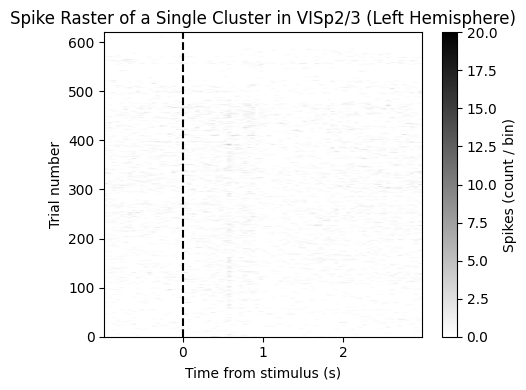

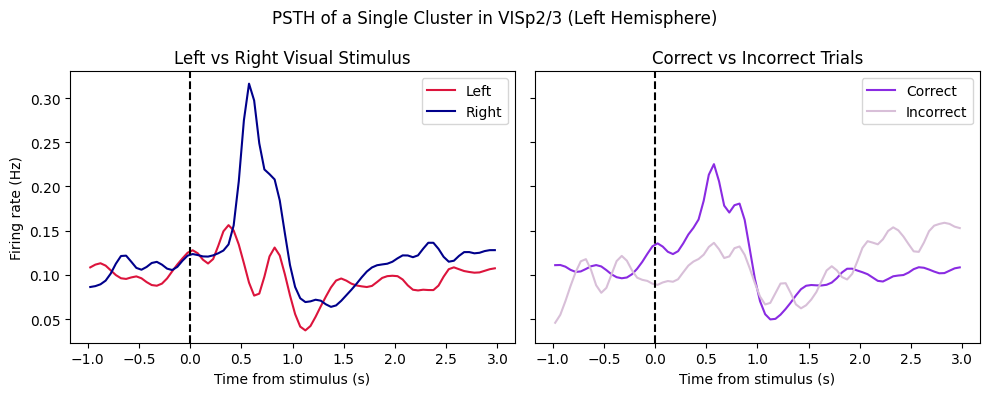

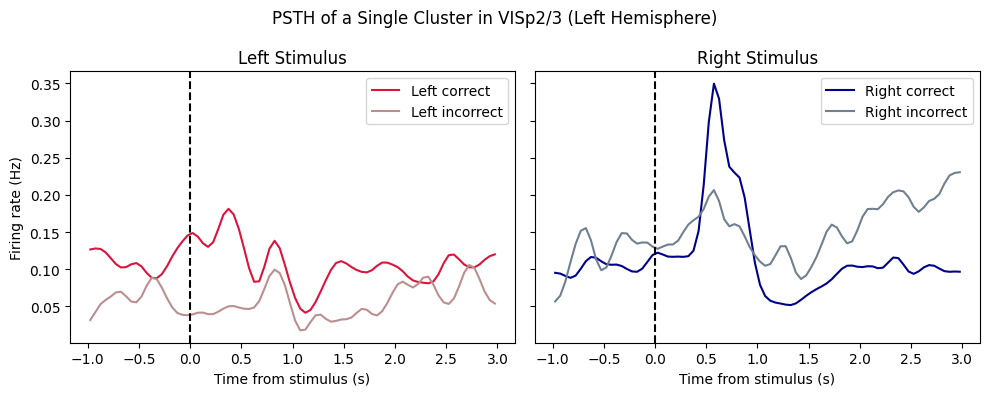

In [7]:
# -----------------------------------------------------------------------------
# 6.3 Spike raster (Single cluster)
# -----------------------------------------------------------------------------
from brainbox.singlecell import bin_spikes

bin_size = 0.05
pre_time = 1
post_time = 3

single_cluster_id = selected_cluster_ids[3]  # 예시로 n번째 good cluster
single_spikes_idx = (spikes['clusters'] == single_cluster_id)

spike_raster, times = bin_spikes(spikes.times[single_spikes_idx],
                                 events,
                                 pre_time=pre_time,
                                 post_time=post_time,
                                 bin_size=bin_size)
spikes_raster = spike_raster / bin_size # firing rate

# 6.4 Raster Plot
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(spike_raster,
               extent=[times[0], times[-1], 0, events.size],
               origin='lower', cmap='binary', aspect='auto',
               vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')
ax.set_title(f'Spike Raster of a Single Cluster in {region_str} (Left Hemisphere)')
plt.colorbar(im, ax=ax, label='Spikes (count / bin)')

plt.tight_layout()

# -----------------------------------------------------------------------------
# 6.5 PSTH (Single cluster) - Left vs Right / Correct vs Incorrect
# -----------------------------------------------------------------------------
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])

psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

correct_idx = (sl.trials['feedbackType'] == 1)
incorrect_idx = (sl.trials['feedbackType'] == -1)

psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

# 6.6 시각화: Left vs Right, Correct vs Incorrect
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle(f'PSTH of a Single Cluster in {region_str} (Left Hemisphere)')

# (좌) Left vs Right
axs[0].plot(times, gaussian_filter1d(psth_left, sigma=1.5), c='crimson', label='Left')
axs[0].plot(times, gaussian_filter1d(psth_right, sigma=1.5), c='darkblue', label='Right')
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')
axs[0].legend()

# (우) Correct vs Incorrect
axs[1].plot(times, gaussian_filter1d(psth_correct, sigma=1.5), c='blueviolet', label='Correct')
axs[1].plot(times, gaussian_filter1d(psth_incorrect, sigma=1.5), c='thistle', label='Incorrect')
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')
axs[1].legend()

plt.tight_layout()


# -----------------------------------------------------------------------------
# 7. PSTH (Single cluter) - Left/Right + Correct/Incorrect 구분
# -----------------------------------------------------------------------------
left_correct_idx = left_idx & (sl.trials['feedbackType'] == 1)
left_incorrect_idx = left_idx & (sl.trials['feedbackType'] == -1)
right_correct_idx = right_idx & (sl.trials['feedbackType'] == 1)
right_incorrect_idx = right_idx & (sl.trials['feedbackType'] == -1)

psth_left_correct = np.nanmean(spike_raster[left_correct_idx], axis=0)
psth_left_incorrect = np.nanmean(spike_raster[left_incorrect_idx], axis=0)
psth_right_correct = np.nanmean(spike_raster[right_correct_idx], axis=0)
psth_right_incorrect = np.nanmean(spike_raster[right_incorrect_idx], axis=0)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle(f'PSTH of a Single Cluster in {region_str} (Left Hemisphere)')

# (좌) Left correct vs incorrect
axs[0].plot(times, gaussian_filter1d(psth_left_correct, sigma=1.5), c='crimson', label='Left correct')
axs[0].plot(times, gaussian_filter1d(psth_left_incorrect, sigma=1.5), c='rosybrown', label='Left incorrect')
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')
axs[0].legend()

# (우) Right correct vs incorrect
axs[1].plot(times, gaussian_filter1d(psth_right_correct, sigma=1.5), c='darkblue', label='Right correct')
axs[1].plot(times, gaussian_filter1d(psth_right_incorrect, sigma=1.5), c='slategray', label='Right incorrect')
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Right Stimulus')
axs[1].legend()

plt.tight_layout()

spike_raster_all.shape: (9, 620, 80)
Left contrast: [0.     0.0625 0.125  0.25   1.    ]
Right contrast: [0.     0.0625 0.125  0.25   1.    ]


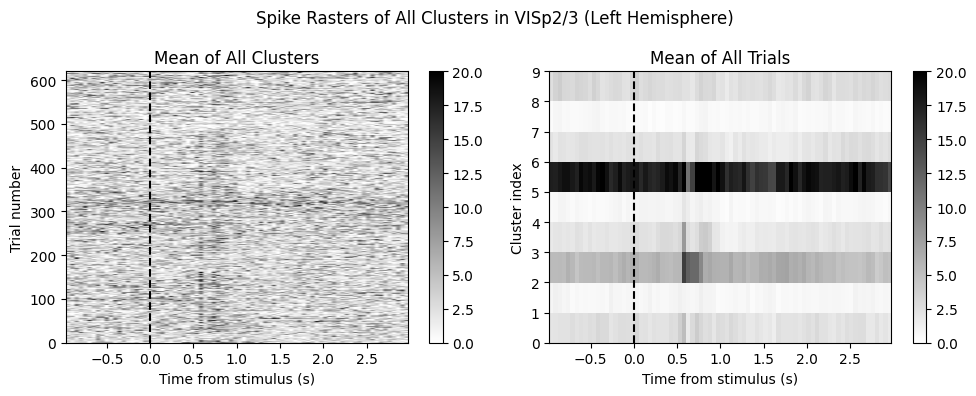

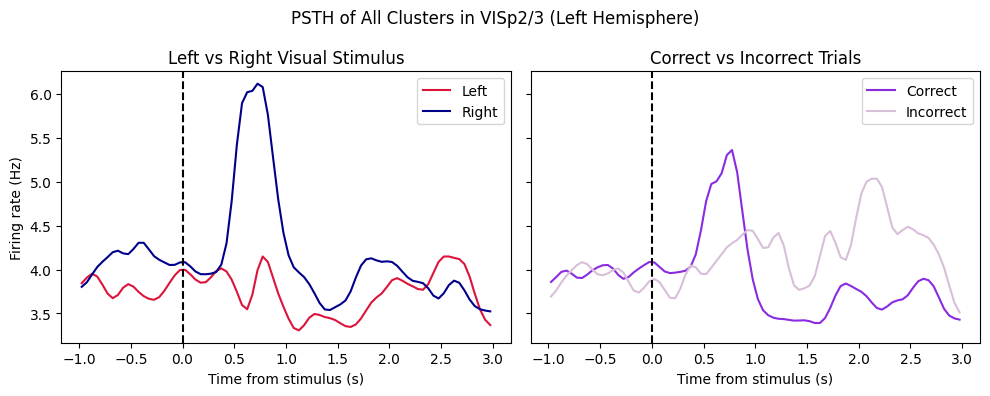

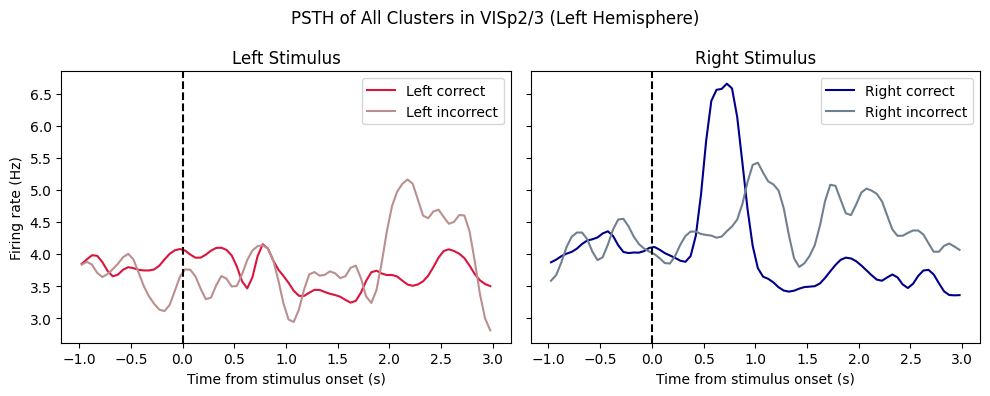

In [8]:
# -----------------------------------------------------------------------------
# 8. Spike raster (All clusters)
# -----------------------------------------------------------------------------
spike_raster_all = []
for cid in selected_cluster_ids:
    spikes_idx = (spikes['clusters'] == cid)
    spike_times_cluster = spikes['times'][spikes_idx]

    spike_raster_cid, _ = bin_spikes(spike_times_cluster,
                                     events,
                                     pre_time=pre_time,
                                     post_time=post_time,
                                     bin_size=bin_size)
    spike_raster_hz = spike_raster_cid / bin_size
    spike_raster_all.append(spike_raster_hz)

spike_raster_all = np.stack(spike_raster_all, axis=0)  # shape = (nClusters, nTrials, nBins)
print('spike_raster_all.shape:', spike_raster_all.shape)

# (뉴런, trial) 평균 => PSTH
psth_all = np.nanmean(spike_raster_all, axis=(0, 1))

# 8.1 시각화 (imshow)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f'Spike Rasters of All Clusters in {region_str} (Left Hemisphere)')

# (좌) trial별 평균 -> 모든 클러스터 평균
im1 = axs[0].imshow(np.nanmean(spike_raster_all, axis=0),
                    extent=[times[0], times[-1], 0, events.size],
                    origin='lower', cmap='binary', aspect='auto',
                    vmax=20, vmin=0)
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Trial number')
axs[0].set_title('Mean of All Clusters')
plt.colorbar(im1, ax=axs[0])

# (우) 클러스터별 평균 -> 모든 trial 평균
im2 = axs[1].imshow(np.nanmean(spike_raster_all, axis=1),
                    extent=[times[0], times[-1], 0, len(selected_cluster_ids)],
                    origin='lower', cmap='binary', aspect='auto',
                    vmax=20, vmin=0)
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_ylabel('Cluster index')
axs[1].set_title('Mean of All Trials')
plt.colorbar(im2, ax=axs[1])

plt.tight_layout()


# -----------------------------------------------------------------------------
# 9. PSTH (All Clusters) - Left/Right & Correct/Incorrect
# -----------------------------------------------------------------------------
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])

print('Left contrast:', np.unique(sl.trials['contrastLeft'][left_idx]))
print('Right contrast:', np.unique(sl.trials['contrastRight'][right_idx]))

correct_idx = (sl.trials['feedbackType'] == 1)
incorrect_idx = (sl.trials['feedbackType'] == -1)

left_correct_idx = left_idx & correct_idx
left_incorrect_idx = left_idx & incorrect_idx
right_correct_idx = right_idx & correct_idx
right_incorrect_idx = right_idx & incorrect_idx

psth_left = np.nanmean(spike_raster_all[:, left_idx, :], axis=(0, 1))
psth_right = np.nanmean(spike_raster_all[:, right_idx, :], axis=(0, 1))
psth_correct = np.nanmean(spike_raster_all[:, correct_idx, :], axis=(0, 1))
psth_incorrect = np.nanmean(spike_raster_all[:, incorrect_idx, :], axis=(0, 1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle(f'PSTH of All Clusters in {region_str} (Left Hemisphere)')

# (좌) Left vs Right
axs[0].plot(times, gaussian_filter1d(psth_left, sigma=1.5), c='crimson', label='Left')
axs[0].plot(times, gaussian_filter1d(psth_right, sigma=1.5), c='darkblue', label='Right')
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left vs Right Visual Stimulus')
axs[0].legend()

# (우) Correct vs Incorrect
axs[1].plot(times, gaussian_filter1d(psth_correct, sigma=1.5), c='blueviolet', label='Correct')
axs[1].plot(times, gaussian_filter1d(psth_incorrect, sigma=1.5), c='thistle', label='Incorrect')
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Correct vs Incorrect Trials')
axs[1].legend()

plt.tight_layout()


# -----------------------------------------------------------------------------
# 9.1 PSTH (All Clusters) - Left/Right + Correct/Incorrect 분할
# -----------------------------------------------------------------------------
psth_left_correct = np.nanmean(spike_raster_all[:, left_correct_idx, :], axis=(0, 1))
psth_left_incorrect = np.nanmean(spike_raster_all[:, left_incorrect_idx, :], axis=(0, 1))
psth_right_correct = np.nanmean(spike_raster_all[:, right_correct_idx, :], axis=(0, 1))
psth_right_incorrect = np.nanmean(spike_raster_all[:, right_incorrect_idx, :], axis=(0, 1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle(f'PSTH of All Clusters in {region_str} (Left Hemisphere)')

# Left correct vs incorrect
axs[0].plot(times, gaussian_filter1d(psth_left_correct, sigma=1.5),
            c='crimson', label='Left correct')
axs[0].plot(times, gaussian_filter1d(psth_left_incorrect, sigma=1.5),
            c='rosybrown', label='Left incorrect')
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus onset (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')
axs[0].legend()

# Right correct vs incorrect
axs[1].plot(times, gaussian_filter1d(psth_right_correct, sigma=1.5),
            c='darkblue', label='Right correct')
axs[1].plot(times, gaussian_filter1d(psth_right_incorrect, sigma=1.5),
            c='slategray', label='Right incorrect')
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus onset (s)')
axs[1].set_title('Right Stimulus')
axs[1].legend()

plt.tight_layout()

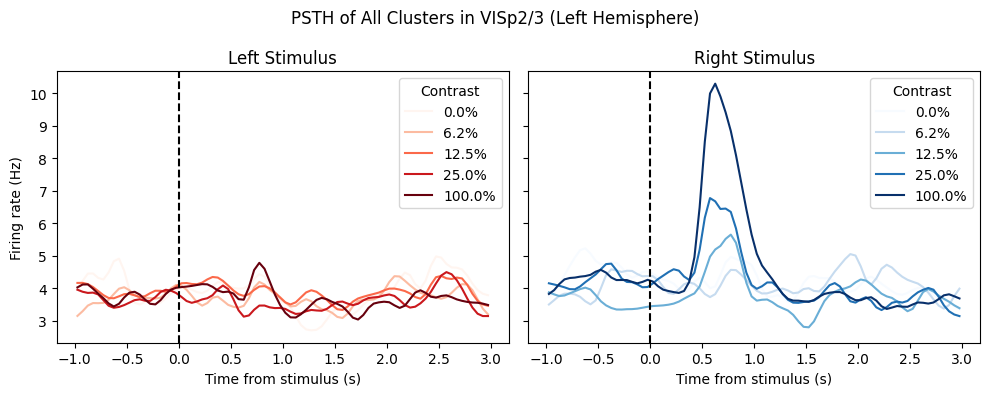

In [9]:
# -----------------------------------------------------------------------------
# 10. Contrast별 PSTH (All Clusters)
# -----------------------------------------------------------------------------
contrasts_left = np.unique(sl.trials['contrastLeft'][left_idx])     # [0.0, 0.0625, 0.125, 0.25, 1.0]
contrasts_right = np.unique(sl.trials['contrastRight'][right_idx])  # 대개 동일

psth_list_left = []
for c in contrasts_left:
    c_mask = left_idx & (sl.trials['contrastLeft'] == c)
    psth_tmp = np.nanmean(spike_raster_all[:, c_mask, :], axis=(0, 1))
    psth_smooth = gaussian_filter1d(psth_tmp, sigma=1.5)
    psth_list_left.append(psth_smooth)

psth_list_right = []
for c in contrasts_right:
    c_mask = right_idx & (sl.trials['contrastRight'] == c)
    psth_tmp = np.nanmean(spike_raster_all[:, c_mask, :], axis=(0, 1))
    psth_smooth = gaussian_filter1d(psth_tmp, sigma=1.5)
    psth_list_right.append(psth_smooth)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
fig.suptitle(f'PSTH of All Clusters in {region_str} (Left Hemisphere)')

# Left stimulus
for i, c_val in enumerate(contrasts_left):
    color_val = i / (len(contrasts_left) - 1) if len(contrasts_left) > 1 else 1.0
    color = plt.cm.Reds(color_val)
    axs[0].plot(times, psth_list_left[i], label=f'{c_val*100:.1f}%', c=color)

axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')
axs[0].set_title('Left Stimulus')
axs[0].legend(title='Contrast')

# Right stimulus
for i, c_val in enumerate(contrasts_right):
    color_val = i / (len(contrasts_right) - 1) if len(contrasts_right) > 1 else 1.0
    color = plt.cm.Blues(color_val)
    axs[1].plot(times, psth_list_right[i], label=f'{c_val*100:.1f}%', c=color)

axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')
axs[1].set_title('Right Stimulus')
axs[1].legend(title='Contrast')

plt.tight_layout()
plt.show()
